# HW2

### due on 1/28/2019 at 11:59 pm

<b>Instructions:</b> Write your answers in the empty code cells below.

<b>Penalties:</b> You will incur penalties if:
<ul>
<li>Your code is wrong</li>
<li>Your code would not work on different data</li>
<li>Your code is unnecessarily slow (you use a for loop, or you use DataFrame.apply unnecessarily, etc)
<li>You answer is composed of more than one output, unless explicitly permitted
</ul>

## Problem

Start by executing the following code, which creates a Series object <b>stock</b> of share prices of Netflix. 

### If the following code works, then you are good...

In [3]:
import pandas as pd
import fix_yahoo_finance as yf
data = yf.download("NFLX", start="1999-01-01", end="2019-01-22")
stock = data.Close
#data.to_csv('NFLX.csv')
#pd.DataFrame(stock).to_csv('NFLX.csv')

[*********************100%***********************]  1 of 1 downloaded


### If not, then download NFLX.csv and execute this instead

In [1]:
import pandas as pd
import numpy as np
stock = pd.read_csv('NFLX.csv',index_col=0).Close
stock.index = stock.index.astype(np.datetime64)

### Continue here

Populating the interactive namespace from numpy and matplotlib


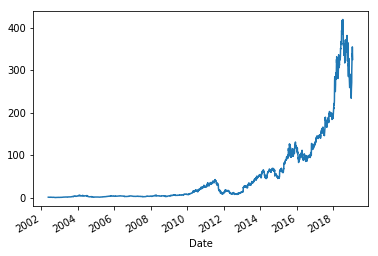

In [2]:
import matplotlib.pyplot as plt
%pylab inline
stock.plot()

Use the Series <i>stock</i> to answer the following questions.

### Question 1


When was the maximum price ever reached? Your code must be a Series with the date and the price. Don't worry about ties.

In [188]:
stock.nlargest(1)

Date
2018-07-09    418.970001
Name: Close, dtype: float64

### Question 2

Find the ten largest <b>one-day % drops</b> (in % compared to the closing cost of the previous trading day). Make sure that your output is a Series object that shows both date and the % drop. 

In [189]:
((stock - stock.shift(1))/stock.shift(1)*100).nsmallest(10)

Date
2004-10-15   -40.906466
2011-10-25   -34.895656
2004-07-16   -28.062516
2012-07-25   -25.015550
2008-04-22   -23.702957
2006-07-25   -20.959607
2014-10-16   -19.369575
2011-09-15   -18.906614
2004-04-16   -16.936787
2002-10-16   -16.493455
Name: Close, dtype: float64

### Question 3

Consider this investment strategy: buy whenever the price <b>goes above</b> the 50-day moving average, and then sell after 3 trading sessions. How much profit (in %) would we make on average? On trading day x, we say that the price "goes above" the 50-day moving average if (1) the price was below the moving average on trading day x-1 and (2) the price is above the moving average on trading day x 

In [192]:
rol = stock.rolling(50).mean()

In [193]:
profitMade = (stock.shift(-3) - stock) / stock*100

In [194]:
profitMade[(stock > rol) & (stock.shift(1) < rol.shift(1))].mean()

2.128725491756133

### Question 4

In which days did we observe that the price has increased of at least 40% within the 5 preceding trading sessions? Report your result as a Series (d,gain) where <i>d</i> is the trading session date when the increase was observed and <i>gain</i> is the maximum percentage gain (%) observed over the 5 days preceding session <i>d</i>. <i>Hint:</i> use a rolling minimum

In [190]:
max_gain = (stock - stock.rolling(1+5).min())/stock.rolling(1+5).min()*100

In [191]:
max_gain[max_gain >= 40]

Date
2002-10-14    43.295151
2002-10-15    47.509635
2002-10-18    48.677948
2012-01-09    41.694331
2013-01-24    50.656548
2013-01-25    73.551686
2013-01-28    65.739698
2013-01-29    72.906658
2013-01-30    62.405581
Name: Close, dtype: float64

### Question 5

What was the worst possible "buy&sell" operation? Find the two days x and y so that the % loss resulting from buying in x and selling in y (with y after x) is maximized. Your code should work for any data. <i>Hint:</i> the method <b>cummin</b> returns the minimum value encountered so far. Make sure to return the trading days x and y, as well as the % loss resulting from buying in x and selling in y.

In [195]:
# loss is a Series with first column as the buy date and the second column as the maximum loss possible
# if bought on that date.
loss = (stock[::-1].shift(1).cummin()-stock)/stock*100

In [196]:
max_loss = loss.nsmallest(1)

In [197]:
max_loss  # The buy date for which global maximum loss.

Date
2011-07-13   -81.990426
Name: Close, dtype: float64

In [198]:
# The sell date for which the above buy results in global maximum loss.
Sell_date = stock[max_loss.idxmin():].idxmin()
Sell_date

Timestamp('2012-09-25 00:00:00')

In [200]:
print("Buy date:", max_loss.idxmin(),"\n"
      "Sell date:", Sell_date, "\n"
      "Loss%:", abs(max_loss[0]))

Buy date: 2011-07-13 00:00:00 
Sell date: 2012-09-25 00:00:00 
Loss%: 81.99042626423137
